<H1><center> COMP 47750 - Machine Learning with Python

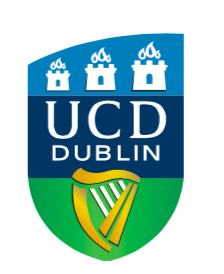

<H3><center> UCD School of Computer Science   
<H4><center>University College Dublin

<center><H2>Assignment 1</H2>      
<H3><em>Algorithm Bias     

#### **Student Name:**    
John O'Meara    

#### **Student Number:**    
19200612

 ---

**Objective**
The objective of this assignment is to assess the impact of algorithm bias on machine
learning algorithms trained with imbalanced data. Submissions should also propose and
evaluate strategies for overcoming this bias.   


**Requirements**
The notebook **AlgorithmBiasCore** contains some basic code to help you get started.
1. Load the Survival dataset using the code in **AlgorithmBiasCore** and assess the
bias of classifiers trained on this dataset, i.e. are classifiers biased towards the
majority class? Consider k- NN, Decision Trees, Logistic Regression and Gradient
Boosting in your assessment. Test for bias using hold-out testing and
cross-validation.     

2. Propose a strategy to rectify this bias. Evaluate the effect of this strategy in terms of
classification bias and overall accuracy. You may choose to work with hold-out
testing only for this evaluation. Discuss the effectiveness of the strategy. If you
consider upsampling using SMOTE as your solution you should consider another
strategy as well.     

3. Test the impact of this strategy on another dataset of your choice. Discuss the
effectiveness of the strategy on this second dataset.     

**Hints :**
While Boosting has not been covered yet, the sklearn implementation has exactly the same
interface as the other classifiers. It can be used with the default parameter settings.   

You should use plots (matplotlib) to report your results.   

**Submission:** This is an individual (not group) project. Submission is through the
Brightspace page. Your submission should comprise your notebook and the second dataset
that you use. Clear all outputs in the notebook before saving for submission. You can use
markdown cells in the notebook to report your findings and conclusions.

# Table of Contents
Click on a link to go to that part of the notebook  
- [Table of Contents](#Table-of-Contents)
- [Introduction](#Introduction)
- [Question 1 - Testing](#Question-1---Testing)
    - [Part 1 - Preparation of Data](#Part-1---Preparation-of-Data)
    - [Part 2 - Training Models](#Part-2---Training-Models)
        - [1.2.1 $k$-NN](#1.2.1-$k$-NN)
        - [1.2.2 Decision Trees](#1.2.2-Decision-Trees)
        - [1.2.3 Logistic Regression](#1.2.3-Logistic-Regression)
        - [1.2.4 Gradient Boosting](#1.2.4-Gradient-Boosting)
    - [Part 3 - Hold-Out Testing](#Part-3---Hold-Out-Testing)
        - [1.3.1 Train/Test Split](#1.3.1-Train/Test-Split)
        - [1.3.2 Training and Bias Analysis](#1.3.2-Training-and-Bias-Analysis)
        - [1.3.3 Plot of Bias Analysis](#1.3.3-Plot-of-Bias-Analysis)
        - [1.3.4 Discussion](#1.3.4-Discussion)
        - [1.3.5 ROC Curves](#1.3.5-ROC-Curves)
    - [Part 4 - Cross Validation](#Part-4---Cross-Validation)
        - [1.4.1 Cross Validation and Bias Analysis](#1.4.1-Cross-Validation-and-Bias-Analysis)
        - [1.4.2 Plot of Bias Analysis](#1.4.2-Plot-of-Bias-Analysis)
        - [1.4.3 Discussion](#1.4.3-Discussion)
- [Question 2 - Bias Rectification Strategy](#Question-2---Bias-Rectification-Strategy)
    - [Strategy 1 - Random Under Sampling](#Strategy-1---Random-Under-Sampling)
        - [2.1.1 Prepare Data](#1.1.1-Prepare-Data)
        - [2.1.2 Training and Bias Analysis](#2.1.2-Training-and-Bias-Analysis)
        - [2.1.3 Plot of Bias Analysis](#2.1.3-Plot-of-Bias-Analysis)
        - [2.1.4 Discussion](#2.1.4-Discussion)
        - [2.1.5 ROC Curves](#2.1.5-ROC-Curves)
    - [Strategy 2 - Synthetic Minority Oversampling Technique (SMOTE)](#Strategy-2---Synthetic-Minority-Oversampling-Technique-(SMOTE))
        - [2.2.1 Prepare Data](#2.2.1-Prepare-Data)
        - [2.2.2 Training and Bias Analysis](#2.2.2-Training-and-Bias-Analysis)
        - [2.2.3 Plot of Bias Analysis](#2.2.3-Plot-of-Bias-Analysis)
        - [2.2.4 Discussion](#2.2.4-Discussion)
        - [2.2.5 ROC Curves](#2.2.5-ROC-Curves)
    - [Strategy 3 - Cost Sensitive Classification](#Strategy-3---Cost-Sensitive-Classification)
- [Question 3 - Test on Another Dataset](#Question-3---Test-on-Another-Dataset)
    - [3.1 Preparation of Data](#3.1-Preparation-of-Data)
    - [3.2 Testing with no Bias Correction](#3.2-Testing-with-no-Bias-Correction)
        - [3.2.1 Training and Bias Analysis](#3.2.1-Training-and-Bias-Analysis)
        - [3.2.2 Plot of Bias Analysis](#3.2.2-Plot-of-Bias-Analysis)
        - [3.2.3 ROC Curves](#3.2.3-ROC-Curves)
        - [3.2.4 Discussion](#3.2.4-Discussion)
    - [3.3 Testing with SMOTE Bias Correction](#3.3-Testing-with-SMOTE-Bias-Correction)
        - [3.3.1 Training and Bias Analysis](#3.3.1-Training-and-Bias-Analysis)
        - [3.3.2 Plot of Bias Analysis](#3.3.2-Plot-of-Bias-Analysis)
        - [3.3.3 ROC Curves](#3.3.3-ROC-Curves)
        - [3.3.4 Discussion](#3.3.4-Discussion)

# Introduction
The dataset is Haberman's Survival Data Set from the UCI ML repository.  
The following is the Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 
   
   
Survival Status Key:

1 = the patient survived 5 years or longer  (GE5)    
2 = the patient died within 5 year          (L5)

# Question 1 - Testing

## Part 1 - Preparation of Data

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from IPython.display import display, Markdown

In [ ]:
surv = pd.read_csv('survival.csv')
surv

In [ ]:
surv['Class'].unique()

In [ ]:
surv['Survived'] = 'GE5'
surv

In [ ]:
surv.loc[surv['Class']==2,'Survived']='L5'
surv

In [ ]:
surv['Survived'].value_counts()

In [ ]:
data_counts = {}
for i in surv['Survived'].value_counts().index:
    data_counts[i] = surv['Survived'].value_counts()[i]
data_counts

In [ ]:
y = surv.pop('Survived').values
surv.pop('Class')
X = surv.values
X.shape, y.shape

In [ ]:
print("Minority class : %0.2f" % (Counter(y)['L5']/len(y)))

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

## Part 2 - Training Models

First I create a list to hold each of the models

In [ ]:
models = []

### 1.2.1 $k$-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=3)
models.append(kNN)

### 1.2.2 Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
models.append(tree)

### 1.2.3 Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(solver='lbfgs')
models.append(log_reg)

### 1.2.4 Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_b = GradientBoostingClassifier()
models.append(grad_b)

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

## Part 3 - Hold-Out Testing

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
                            confusion_matrix, classification_report, roc_curve, auc
from collections import Counter
from sklearn.model_selection import train_test_split

### 1.3.1 Train/Test Split

Split the data evenly - use half as a training set and the other half for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2, random_state=42)

### 1.3.2 Training and Bias Analysis

Fist define a function to display the confusion matrices for each of the models.      
(Code supplied by Professor Padraig Cunningham - Machine Learning with Python - Week 04 - Evaluation)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
        print()
    else:
        #print('Confusion matrix, without normalization')
        print()
    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Train each model in the list on the training dataset and then test it on the testing set, gathering metrics for each model.

In [ ]:
print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data :", X_test.shape)
print()
results_hot = {}
roc_results = {}
for model in models:
    fitted_model = model.fit(X_train, y_train)
    y_pred = fitted_model.predict(X_test)
    y_score = fitted_model.predict_proba(X_test)
    display(Markdown("<b>===================== "+type(model).__name__+" =====================</b>"))
    print('    Accuracy:  %0.2f' % accuracy_score(y_pred, y_test))
    pred_neg = Counter(y_pred)['L5']
    test_neg = Counter(y_test)['L5']

    print("    Minority class in test set : %0.2f" % (test_neg/len(y_test)))
    results_hot[type(model).__name__] = pred_neg/len(y_pred)*100
    fp_rate, tp_rate, t = roc_curve(y_test, y_score[:,0], pos_label='GE5')
    roc_results[type(model).__name__] = [fp_rate, tp_rate, t, auc(fp_rate, tp_rate)]
    print("    Predicted minority class   : %0.2f" % (pred_neg/len(y_pred)))
    print()
    print()
    display(Markdown("<b>Confusion Matrix:</b>"))
    conf = confusion_matrix(y_test, y_pred, labels=["L5", "GE5"])
    print(conf)
    L = ["[0][0] - True Negative:  ", \
         "[0][1] - False Positive:  ", \
         "[1][0] - False Negative:  ", \
         "[1][1] - True Positive:  "]

    c = 0
    for i in conf:
        for k in i:
            display(Markdown((L[c]+str(k))))
            c+=1
    print()
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=['GE5','L5'],
                          title='Confusion matrix, without normalization')
    print()
    display(Markdown("<b>Classification Report:</b>"))
    print("------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------")
    print()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 1.3.3 Plot of Bias Analysis

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

The simplest indicator of bias is to display the percentage of Minority Class predicted by each model against the overall percentage of Minority Class present in the Dataset.

In [ ]:
color=['red', 'blue', 'green','cyan','magenta']
bars = ['Data Set'] + list(results_hot.keys())
values = [(Counter(y)['L5']/len(y)*100)] + list(results_hot.values())

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=['red', 'blue', 'green','cyan','magenta'],alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

### 1.3.4 Discussion

The overall Dataset has has the minority class at 26%.
The Test Set has the minority class at 24%
       
kNN returns a minority class prediction at 16%  
Decision Tree returns a minority class prediction at 29% - the only one not to amplify the underrepresentation of the minority class.      
Logistic Regression returns a minority class prediction at 7%   
Gradient Boosting returns a minority class prediction at 23%   
   
The range of accuracies across the models ranges from 66% - 78%.
In adjusting for bias, we will observe a reduction in these accuracy metrics, but we would hope not to see them drop excessively low.

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 1.3.5 ROC Curves

As can be seen from the ROC curves for the models below, they are all quite close to the reference line with Area Under Curve (AUC) values ranging from 0.57 to 0.67 which aren't that much better than the reference value of 0.5 for a random classifier.

In [ ]:
plt.figure()
plt.figure(figsize=(6,6))
lw = 2
col_pos = 1
for key in roc_results.keys():
    plt.plot(roc_results[key][0], roc_results[key][1], color=color[col_pos],lw=lw, label='ROC '+key+' (area = %0.2f)' % roc_results[key][3])
    col_pos+=1
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc="lower right")
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

## Part 4 - Cross Validation

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred, labels=["L5", "GE5"])[1, 1]
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred, labels=["L5", "GE5"])[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred, labels=["L5", "GE5"])[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred, labels=["L5", "GE5"])[1, 0]
scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn),
           'accuracy' : make_scorer(accuracy_score), 
           'precision_GE5' : make_scorer(precision_score, pos_label='GE5'),
           'precision_L5' : make_scorer(precision_score, pos_label='L5'),
           'recall_GE5' : make_scorer(recall_score, pos_label='GE5'), 
           'recall_L5' : make_scorer(recall_score, pos_label='L5'), 
           'f1_score_GE5' : make_scorer(f1_score, pos_label='GE5'),            
           'f1_score_L5' : make_scorer(f1_score, pos_label='L5')            
          }



folds = 4
v = 0 #  use 1 or 0 to switch on or off verbose mode

### 1.4.1 Cross Validation and Bias Analysis

In [ ]:
results_cv = {}
for m in models:
    cv_results = cross_validate(m, X, y, cv= folds, scoring=scoring, return_train_score=False, 
                                    verbose = v, n_jobs = -1)
    
    pred_neg = cv_results['test_tn'].sum()+cv_results['test_fn'].sum()
    # fp_rate = FP/FP+TN
    fp_rate = cv_results['test_fp'].sum()/(cv_results['test_fp'].sum()+cv_results['test_tn'].sum())
    # fn_rate = FN/FN+TP
    fn_rate = cv_results['test_fn'].sum()/(cv_results['test_fn'].sum()+cv_results['test_tp'].sum())
  
    print("{} x CV {:28} Predicted L5: {:4}            Predicted L5 %: {}%        Acutal L5: {}".format(\
            folds, type(m).__name__, pred_neg, str(pred_neg/(data_counts['L5']+data_counts['GE5'])*100)[:4],\
                                                                                            data_counts['L5']))   
    
    print("                                    False Positive Rate: {}     False Negative Rate: {}".format(\
                                                                            str(fp_rate)[:4], str(fn_rate)[:4])) 
    
    results_cv[type(m).__name__] = pred_neg/(data_counts['L5']+data_counts['GE5'])*100
    
    print("              Accuracy: {}".format(str(cv_results['test_accuracy'].mean())[:4]))
    print()
    print("              Precision GE5: {}   Precision L5: {}".format(str(cv_results['test_precision_GE5'].mean())[:4], 
                                                                      str(cv_results['test_precision_L5'].mean())[:4]))
    print("              Recall GE5   : {}   Recall L5   : {}".format(str(cv_results['test_recall_GE5'].mean())[:4], 
                                                                      str(cv_results['test_recall_L5'].mean())[:4]))
    print("              F1 Score GE5 : {}   F1 Score L5 : {}".format(str(cv_results['test_f1_score_GE5'].mean())[:4], 
                                                                      str(cv_results['test_f1_score_L5'].mean())[:4]))
    print()
    print()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 1.4.2 Plot of Bias Analysis

In [ ]:
color=['red', 'blue', 'green','cyan','magenta']
bars = ['Data Set'] + list(results_cv.keys())
values = [(Counter(y)['L5']/len(y)*100)] + list(results_cv.values())

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=['red', 'blue', 'green','cyan','magenta'],alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

### 1.4.3 Discussion

Since Cross Validation works with the entire dataset, we would expect to see an improvement in the prediction of the minority class across all 4 models.

**kNN**   
Here we see an increase in minority class representation from 16% with Holdout to 37% with Cross Validation.   
The minority class is now over-represented.  
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model from .77 down to 0.60.   
*Precision:* &nbsp;&nbsp;Precision has dropped in both classes.   
*Recall:*    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped in the Majority class but increased for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score again has dropped for both classes.  


**Decision Tree Classifier**   
Here we see an increase in minority class representation from 29% with Holdout to 35% with Cross Validation.   
The minority class was already over-represented, but this strategy hasn't increased it that much further.   
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model only slightly from .66 down to 0.60.   
*Precision:* &nbsp;&nbsp;Precision has dropped in the Majority class but increased for the minority class   
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped in the Majority class but increased for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score again has dropped for both classes.  


**Logistic Regression**   
Here we see a negligible increase in minority class representation from 7% with Holdout to 8% with Cross Validation.   
The minority class is still heavily under represented in this model.
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model only slightly from .78 down to 0.75.   
*Precision:* &nbsp;&nbsp;Precision has dropped in the Majority class but increased for the minority class   
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has remained much the same.   
*F1 Score:* &nbsp;&nbsp;F1 score has also remained much the same.  



**Gradient Boosting Classifier**   
Here we see a sizeable increase in minority class representation from 23% with Holdout to 46% with Cross Validation.   
The minority class is now heavily over-represented.   
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model significantly from .71 down to 0.53.   
*Precision:* &nbsp;&nbsp;Precision has dropped in both classed.       
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped significantly in the Majority class but increased for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score has dropped significantly for the majority class, but remained much the same for the minority class.     



|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

# Question 2 - Bias Rectification Strategy

## Strategy 1 - Random Under Sampling (RUS)

Random Undersampling addresses bias by attempting to balance the minority and majority classes by randomly deleting examples from the majority class. 

### 2.1.1 Prepare Data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2, random_state=42)

Instantiate a Random Under Sampler and use it to create undersampled training data.

In [ ]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

**We compare counts to verify that the majority class has been undersampled.**

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_rus, return_counts=True)

**Class counts are now even at 45.**

### 2.1.2 Training and Bias Analysis

In [ ]:
print("Shape of Training Data:", X_rus.shape)
print("Shape of Testing Data :", X_test.shape)
print()
results_hot = {}
roc_results = {}
for model in models:
    fitted_model = model.fit(X_rus, y_rus)
    y_pred = fitted_model.predict(X_test)
    y_score = fitted_model.predict_proba(X_test)
    display(Markdown("<b>===================== "+type(model).__name__+" =====================</b>"))
    print('    Accuracy:  %0.2f' % accuracy_score(y_pred, y_test))
    pred_neg = Counter(y_pred)['L5']
    test_neg = Counter(y_test)['L5']

    print("    Minority class in test set : %0.2f" % (test_neg/len(y_test)))
    results_hot[type(model).__name__] = pred_neg/len(y_pred)*100
    fp_rate, tp_rate, t = roc_curve(y_test, y_score[:,0], pos_label='GE5')
    roc_results[type(model).__name__] = [fp_rate, tp_rate, t, auc(fp_rate, tp_rate)]
    print("    Predicted minority class   : %0.2f" % (pred_neg/len(y_pred)))
    print()
    print()
    display(Markdown("<b>Confusion Matrix:</b>"))
    conf = confusion_matrix(y_test, y_pred, labels=["L5", "GE5"])
    print(conf)
    L = ["[0][0] - True Negative:  ", \
         "[0][1] - False Positive:  ", \
         "[1][0] - False Negative:  ", \
         "[1][1] - True Positive:  "]

    c = 0
    for i in conf:
        for k in i:
            display(Markdown((L[c]+str(k))))
            c+=1
    print()
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=['GE5','L5'],
                          title='Confusion matrix, without normalization')
    print()
    display(Markdown("<b>Classification Report:</b>"))
    print("------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------")
    print()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 2.1.3 Plot of Bias Analysis

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline 

The simplest indicator of bias is to display the percentage of Minority Class predicted by each model against the overall percentage of Minority Class present in the Dataset.

In [ ]:
color=['red', 'blue', 'green','cyan','magenta']
bars = ['Data Set'] + list(results_hot.keys())
values = [(Counter(y)['L5']/len(y)*100)] + list(results_hot.values())

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=['red', 'blue', 'green','cyan','magenta'],alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

### 2.1.4 Discussion

At first glance this appears promising as it has improved the prediction of the minority class across all models.   
However, in this case this isn't a realistic strategy for bias correction as the dataset is already small and RUS simply reduces it further as evidence by the size of the training set - only 45 examples.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 2.1.5 ROC Curves

The ROC curves below seem to closely match one another except for gradient boosting at lower levels.   
The AUC figures have actually worsened, but again we can disregard as the samples set here is far too small to be meaningful.  

In [ ]:
plt.figure()
plt.figure(figsize=(6,6))
lw = 2
col_pos = 1
for key in roc_results.keys():
    plt.plot(roc_results[key][0], roc_results[key][1], color=color[col_pos],lw=lw, label='ROC '+key+' (area = %0.2f)' % roc_results[key][3])
    col_pos+=1
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc="lower right")
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

## Strategy 2 - Synthetic Minority Oversampling Technique (SMOTE)

Instead of attempting to correct the imbalance by reducing the size of the Majority Class, another strategy is the increase the size of the Minority Class.      

This can be done by Random Oversampling which is effectively the opposite of RUS.   
Random samples from the Minority Class are duplicated to increase the sample size.    
However, this strategy doesn't add any new information to the model since the new examples are simply duplicates.     

Instead, SMOTE uses a form of Data Augmentation to synthesise new data examples from the existing set.    

### 2.2.1 Prepare Data

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2, random_state=42)

*Here we create an instance of a SMOTE model with a sampling strategy that results in the numbers of both classes being even.*

In [ ]:
sm = SMOTE(random_state=42, sampling_strategy = 1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

*We compare counts to verify that the minority class has been upsampled.*

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_train_sm, return_counts=True)

*Class counts are now equal at 108.*

### 2.2.2 Training and Bias Analysis

In [ ]:
print("Shape of Training Data:", X_train_sm.shape)
print("Shape of Testing Data :", X_test.shape)
print()
results_hot = {}
roc_results = {}
for model in models:
    fitted_model = model.fit(X_train_sm, y_train_sm)
    y_pred = fitted_model.predict(X_test)
    y_score = fitted_model.predict_proba(X_test)
    display(Markdown("<b>===================== "+type(model).__name__+" =====================</b>"))
    print('    Accuracy:  %0.2f' % accuracy_score(y_pred, y_test))
    pred_neg = Counter(y_pred)['L5']
    test_neg = Counter(y_test)['L5']

    print("    Minority class in test set : %0.2f" % (test_neg/len(y_test)))
    results_hot[type(model).__name__] = pred_neg/len(y_pred)*100
    fp_rate, tp_rate, t = roc_curve(y_test, y_score[:,0], pos_label='GE5')
    roc_results[type(model).__name__] = [fp_rate, tp_rate, t, auc(fp_rate, tp_rate)]
    print("    Predicted minority class   : %0.2f" % (pred_neg/len(y_pred)))
    print()
    print()
    display(Markdown("<b>Confusion Matrix:</b>"))
    conf = confusion_matrix(y_test, y_pred, labels=["L5", "GE5"])
    print(conf)
    L = ["[0][0] - True Negative:  ", \
         "[0][1] - False Positive:  ", \
         "[1][0] - False Negative:  ", \
         "[1][1] - True Positive:  "]

    c = 0
    for i in conf:
        for k in i:
            display(Markdown((L[c]+str(k))))
            c+=1
    print()
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plot_confusion_matrix(y_test, y_pred, classes=['GE5','L5'],
                          title='Confusion matrix, without normalization')
    print()
    display(Markdown("<b>Classification Report:</b>"))
    print("------------------------------------------------------")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------------------")
    print()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 2.2.3 Plot of Bias Analysis

In [ ]:
color=['red', 'blue', 'green','cyan','magenta']
bars = ['Data Set'] + list(results_hot.keys())
values = [(Counter(y)['L5']/len(y)*100)] + list(results_hot.values())

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=['red', 'blue', 'green','cyan','magenta'],alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 2.2.4 Discussion

**kNN**   
Here we see a doubling of minority class representation from 16% to 33%.   
The minority class is now over-represented.  
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model from 0.77 down to 0.65.   
*Precision:* &nbsp;&nbsp;Precision has dropped significantly in the minority class.   
*Recall:*    &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped in the Majority class but increased for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score again has dropped for both classes.  


**Decision Tree Classifier**   
Here we see a small increase in minority class representation from 29% to 31%.   
The minority class was already over-represented, but this strategy hasn't increased it that much further.   
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model only slightly from 0.66 down to 0.63.   
*Precision:* &nbsp;&nbsp;Precision has remained largely unchanged for both classes.    
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has remained largely unchanged for both classes.    
*F1 Score:* &nbsp;&nbsp;F1 score has remained largely unchanged for both classes.      


**Logistic Regression**   
Here we see a massive increase in minority class representation from 7% to 38%.   
The minority class is now over represented in this model.
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model from 0.78 down to 0.67.   
*Precision:* &nbsp;&nbsp;Precision has dropped significantly for both classes.     
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped significantly for the majority class but also increased significantly for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score has dropped slightly for the majority class, but increased dramatically for the minority class.  



**Gradient Boosting Classifier**   
Here we see a sizeable increase in minority class representation from 23% to 41%.   
The minority class is now over-represented.   
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model slightly from 0.71 down to 0.63.   
*Precision:* &nbsp;&nbsp;Precision has remained largely unchanged for both classes.       
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped slightly for the Majority class and increased slightly for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score has dropped slightly for the Majority class and increased slightly for the minority class.   


Decision Tree Classifier and Gradient Boosting Classifier appear to give the best balance between correcting bias and maintaining accuracy and other metrics.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 2.2.5 ROC Curves

Here we see a significant improvement on AUC metrics across the board indicating an improvement in classification.  

In [ ]:
plt.figure()
plt.figure(figsize=(6,6))
lw = 2
col_pos = 1
for key in roc_results.keys():
    plt.plot(roc_results[key][0], roc_results[key][1], color=color[col_pos],lw=lw, label='ROC '+key+' (area = %0.2f)' % roc_results[key][3])
    col_pos+=1
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc="lower right")
plt.show()

## Strategy 3 - Cost Sensitive Classification

Cost Sensitive Classification attaches a cost to misclassification errors.   
The aim for the algorithim is to minimise the total cost of classification.   
   
In order to correct bias, different classification errors can be assigned different costs, such as a mis-classified minority class example incurring a much higher cost than one from the Majority Class.  

 ---

To implement this strategy, I attempted to use the package "CostCla" which can be found at:    
http://albahnsen.github.io/CostSensitiveClassification/

However, when attempting to import the CostSensitiveDecisionTreeClassifier, I received the following error:    
*ModuleNotFoundError: No module named 'sklearn.externals.joblib'*

Some research revealed that this was due to a deprecated (June 2019) part of ScikitLearn and could be worked around by either:     
- editing the package code to search for a top level joblib instead of the deprecated variant or
- uninstalling ScikitLearn and reinstalling an older version that would support this library.  

Given the time contraints for this assignment, I didn't want to attempt either strategy when I know from past experience that those kind of workarounds can waste days.  I've left the code here as a reminder to perhaps pursue this at a later date if I don't come across a different Cost Sensitive Classifier in the interim.  

In [ ]:
#DO NOT RUN THIS CELL!!!!
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

In [ ]:
#DO NOT RUN THIS CELL!!!!
fitted_tree_std = tree.fit(X_train, y_train)
y_pred_tree_std = fitted_tree_std.predict(X_test)


tree_csc = CostSensitiveDecisionTreeClassifier()
fitted_tree_csc = tree_csc.fit(X_train, y_train)
y_pred_tree_csc = fitted_tree_csc.predict(X_test)

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

# Question 3 - Test on Another Dataset

## 3.1 Preparation of Data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['target'] = np.where(diabetes['neg_pos'] == 'tested_positive', 1, 0)
diabetes.head()

In [ ]:
data_counts = {}
for i in diabetes['target'].value_counts().index:
    data_counts[i] = diabetes['target'].value_counts()[i]
data_counts

In [ ]:
data_counts[0]

In [ ]:
diabetes.pop('neg_pos').values
y = diabetes.pop('target').values
Xorig = diabetes.values
scaler = StandardScaler()
X = scaler.fit_transform(Xorig)
X.shape, y.shape

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

## 3.2 Testing with no Bias Correction

Here the dataset is analysed using the two most promising models from Questions 1&2 - Decision Tree Classifier and Gradient Boost Classifier.   

### 3.2.1 Training and Bias Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=1/2)

In [ ]:
fitted_tree = tree.fit(X_train, y_train)
y_pred_tree = fitted_tree.predict(X_test)
y_score = fitted_tree.predict_proba(X_test)
fp_rate_tree, tp_rate_tree, t_tree = roc_curve(y_test, y_score[:,0], pos_label=0)

In [ ]:
fitted_grad_b = grad_b.fit(X_train, y_train)
y_pred_gb = fitted_grad_b.predict(X_test)
y_score = fitted_grad_b.predict_proba(X_test)
fp_rate_grad, tp_rate_grad, t_grad = roc_curve(y_test, y_score[:,0], pos_label=0)

In [ ]:
display(Markdown("<b>===================== "+type(tree).__name__+" =====================</b>"))
print('    Accuracy:  %0.2f' % accuracy_score(y_pred_tree, y_test))
pred_neg = Counter(y_pred_tree)[1]
test_neg = Counter(y_test)[1]

print("    Minority class in original set : %0.2f" % (data_counts[1]/(data_counts[1] + data_counts[0])))
print("    Minority class in test set     : %0.2f" % (test_neg/len(y_test)))
print("    Predicted minority class       : %0.2f" % (pred_neg/len(y_pred_tree)))
print()
print()
display(Markdown("<b>===================== "+type(grad_b).__name__+" =====================</b>"))
print('    Accuracy:  %0.2f' % accuracy_score(y_pred_gb, y_test))
pred_neg = Counter(y_pred_gb)[1]
test_neg = Counter(y_test)[1]

print("    Minority class in original set : %0.2f" % (data_counts[1]/(data_counts[1] + data_counts[0])))
print("    Minority class in test set     : %0.2f" % (test_neg/len(y_test)))
print("    Predicted minority class       : %0.2f" % (pred_neg/len(y_pred_gb)))
print()
display(Markdown("<b>=====================================================================</b>"))
print()
display(Markdown("<b>Confusion Matrix: "+type(tree).__name__+"</b>"))
conf = confusion_matrix(y_test, y_pred_tree, labels=[1, 0])
print(conf)
L = ["[0][0] - True Negative:  ", \
     "[0][1] - False Positive:  ", \
     "[1][0] - False Negative:  ", \
     "[1][1] - True Positive:  "]

c = 0
for i in conf:
    for k in i:
        display(Markdown((L[c]+str(k))))
        c+=1
print()
display(Markdown("<b>Confusion Matrix: "+type(grad_b).__name__+"</b>"))
conf = confusion_matrix(y_test, y_pred_gb, labels=[1, 0])
print(conf)
L = ["[0][0] - True Negative:  ", \
     "[0][1] - False Positive:  ", \
     "[1][0] - False Negative:  ", \
     "[1][1] - True Positive:  "]

c = 0
for i in conf:
    for k in i:
        display(Markdown((L[c]+str(k))))
        c+=1
print()
display(Markdown("<b>=====================================================================</b>"))
print()
display(Markdown("<b>Classification Report: "+type(tree).__name__+"</b>"))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred_tree))
print("------------------------------------------------------")
print()
display(Markdown("<b>Classification Report: "+type(grad_b).__name__+"</b>"))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred_gb))
print("------------------------------------------------------")
print()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 3.2.2 Plot of Bias Analysis

In [ ]:
color=['red', 'blue', 'green','cyan','magenta']
bars = ['Data Set', type(tree).__name__, type(grad_b).__name__]
values = [(Counter(y)[1]/len(y)*100), 
          (Counter(y_pred_tree)[1]/len(y_pred_tree)*100), 
          (Counter(y_pred_gb)[1]/len(y_pred_gb)*100)
         ]

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=['red', 'blue', 'green','cyan','magenta'],alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 3.2.3 ROC Curves

In [ ]:
plt.figure()
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fp_rate_tree, tp_rate_tree, color='blue',lw=lw, label='ROC DecisionTreeClassifier (area = %0.2f)' % auc(fp_rate_tree, tp_rate_tree))
plt.plot(fp_rate_grad, tp_rate_grad,  color='green',lw=lw, label='ROC Gradient Boosting Classifier (area = %0.2f)' % auc(fp_rate_grad, tp_rate_grad))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc="lower right")
plt.show()

### 3.2.4 Discussion

This dataset has resulted in models that show far less bias than the previous one.  
This can be attributed to the size of the dataset, with larger sets of data more likely to be representative of the true situation.   
Decision Tree classifier is underpredicting the Minority Class and showing an alarming number of False Negatives - nearly as many as True Negatives.   
58 FN vs. 69 TN.   
Since these models are mostly unbiased to begin with, it will be interesting to see the effect of the correction strategy.  
As can be seen from the ROC curve above, AUC for Gradient Boosting Classifier is 0.84 showing that it is an excellent classifier in this case.  

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

## 3.3 Testing with SMOTE Bias Correction

### 3.3.1 Training and Bias Analysis

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/2, random_state=42)

**Here we create an instance of a SMOTE model with a sampling strategy that results in the numbers of both classes being even.**

In [ ]:
sm = SMOTE(random_state=42, sampling_strategy = 1.0)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)

**We compare counts to verify that the minority class has been upsampled.**

In [ ]:
np.unique(y_train, return_counts=True)

In [ ]:
np.unique(y_train_sm, return_counts=True)

**Class counts are now even at 246.**

In [ ]:
fitted_tree = tree.fit(X_train_sm, y_train_sm)
y_pred_tree = fitted_tree.predict(X_test)
y_score = fitted_tree.predict_proba(X_test)
fp_rate_tree, tp_rate_tree, t_tree = roc_curve(y_test, y_score[:,0], pos_label=0)

In [ ]:
fitted_grad_b = grad_b.fit(X_train_sm, y_train_sm)
y_pred_gb = fitted_grad_b.predict(X_test)
y_score = fitted_grad_b.predict_proba(X_test)
fp_rate_grad, tp_rate_grad, t_grad = roc_curve(y_test, y_score[:,0], pos_label=0)

In [ ]:
display(Markdown("<b>===================== "+type(tree).__name__+" =====================</b>"))
print('    Accuracy:  %0.2f' % accuracy_score(y_pred_tree, y_test))
pred_neg = Counter(y_pred_tree)[1]
test_neg = Counter(y_test)[1]

print("    Minority class in original set : %0.2f" % (data_counts[1]/(data_counts[1] + data_counts[0])))
print("    Minority class in test set     : %0.2f" % (test_neg/len(y_test)))
print("    Predicted minority class       : %0.2f" % (pred_neg/len(y_pred_tree)))
print()
print()
display(Markdown("<b>===================== "+type(grad_b).__name__+" =====================</b>"))
print('    Accuracy:  %0.2f' % accuracy_score(y_pred_gb, y_test))
pred_neg = Counter(y_pred_gb)[1]
test_neg = Counter(y_test)[1]

print("    Minority class in original set : %0.2f" % (data_counts[1]/(data_counts[1] + data_counts[0])))
print("    Minority class in test set     : %0.2f" % (test_neg/len(y_test)))
print("    Predicted minority class       : %0.2f" % (pred_neg/len(y_pred_gb)))
print()
display(Markdown("<b>=====================================================================</b>"))
print()
display(Markdown("<b>Confusion Matrix: "+type(tree).__name__+"</b>"))
conf = confusion_matrix(y_test, y_pred_tree, labels=[1, 0])
print(conf)
L = ["[0][0] - True Negative:  ", \
     "[0][1] - False Positive:  ", \
     "[1][0] - False Negative:  ", \
     "[1][1] - True Positive:  "]

c = 0
for i in conf:
    for k in i:
        display(Markdown((L[c]+str(k))))
        c+=1
print()
display(Markdown("<b>Confusion Matrix: "+type(grad_b).__name__+"</b>"))
conf = confusion_matrix(y_test, y_pred_gb, labels=[1, 0])
print(conf)
L = ["[0][0] - True Negative:  ", \
     "[0][1] - False Positive:  ", \
     "[1][0] - False Negative:  ", \
     "[1][1] - True Positive:  "]

c = 0
for i in conf:
    for k in i:
        display(Markdown((L[c]+str(k))))
        c+=1
print()
display(Markdown("<b>=====================================================================</b>"))
print()
display(Markdown("<b>Classification Report: "+type(tree).__name__+"</b>"))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred_tree))
print("------------------------------------------------------")
print()
display(Markdown("<b>Classification Report: "+type(grad_b).__name__+"</b>"))
print("------------------------------------------------------")
print(classification_report(y_test, y_pred_gb))
print("------------------------------------------------------")
print()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 3.3.2 Plot of Bias Analysis

In [ ]:
color=['red', 'blue', 'green','cyan','magenta']
bars = ['Data Set', type(tree).__name__, type(grad_b).__name__]
values = [(Counter(y)[1]/len(y)*100), 
          (Counter(y_pred_tree)[1]/len(y_pred_tree)*100), 
          (Counter(y_pred_gb)[1]/len(y_pred_gb)*100)
         ]

y_array = np.arange(len(bars))

plt.bar(y_array, values, align='center', color=['red', 'blue', 'green','cyan','magenta'],alpha=0.2)
plt.xticks(y_array, bars, rotation=45, ha='right')
plt.ylabel('Percentage of Minority Class')
plt.title('Relative Algorithm Bias')
 
plt.show()

|    |
|---:| 
|<H1>Click to jump back to [Table of Contents](#Table-of-Contents)</H1>                               |

 ---

### 3.3.3 ROC Curves

In [ ]:
plt.figure()
plt.figure(figsize=(6,6))
lw = 2
plt.plot(fp_rate_tree, tp_rate_tree, color='blue',lw=lw, label='ROC DecisionTreeClassifier (area = %0.2f)' % auc(fp_rate_tree, tp_rate_tree))
plt.plot(fp_rate_grad, tp_rate_grad,  color='green',lw=lw, label='ROC Gradient Boosting Classifier (area = %0.2f)' % auc(fp_rate_grad, tp_rate_grad))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc="lower right")
plt.show()

### 3.3.4 Discussion

**Decision Tree Classifier**   
Here we see a small increase in minority class representation from 33% to 34%.   
The Minority Class representation now matches the actual data in the test set.
There are still the same number of False Negatives, but there are more True Negatives now being predicted.
The slight improvement in the AUC on the ROC Curve shows that this modification has slightly improved this classifier.

*Accuracy:* &nbsp;&nbsp;Surprisingly, the accuracy of the model has increased slightly from 0.69 down to 0.70.   
*Precision:* &nbsp;&nbsp;Precision has increased slightly for both classes.    
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has improved slightly for the Minority class while the Majority Class remains unchanged.    
*F1 Score:* &nbsp;&nbsp;F1 score hhas improved slightly for the Minority class while the Majority Class remains unchanged.          


**Gradient Boosting Classifier**   
The minority class representation has now increased from 36% to 41%.   
The minority class is now over-represented.  
The slight reduction in the AUC on the ROC Curve shows that this modification has effectively disimproved this classifier.
    
*Accuracy:* &nbsp;&nbsp;This has dropped the accuracy of the model slightly from 0.77 down to 0.75.   
*Precision:* &nbsp;&nbsp;Precision has improved slightly for the Majority Class and reduced for the Minority Class.     
*Recall:* &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Recall has dropped slightly for the Majority class and increased slightly for the minority class.   
*F1 Score:* &nbsp;&nbsp;F1 score has dropped slightly for the Majority class and remained the same for the minority class.   

 ---

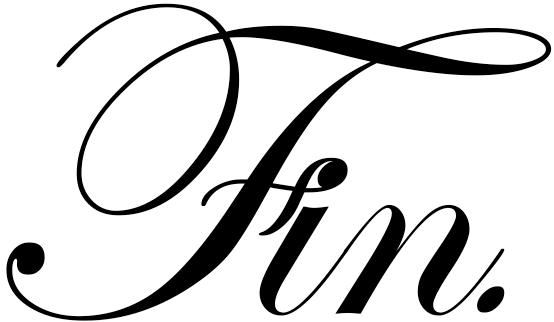

 ---